In [325]:
# run this on doberman
import numpy as np
from pymongo import MongoClient
from datetime import datetime, timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import scipy
from scipy.optimize import curve_fit
import os

In [326]:
client = MongoClient(os.environ['MONITOR_URI'])

In [327]:
def get_data(controller_name, date_start, date_end):
    db = client['data']
    if controller_name not in db.list_collection_names(False):
        print('Didn\'t find a controller named %s' % controller_name)
    else:
        when = []
        values = []
        cuts = {'when' : {'$gte' : date_start}}
        if date_end is not None:
            cuts['when'].update({'$lte' : date_end})
        for row in db[controller_name].find(cuts):
            when.append(row['when'])
            values.append(row['data'])
    #print('Loaded %i entries from ' % len(values), controller_name)
    return when, np.array(values)

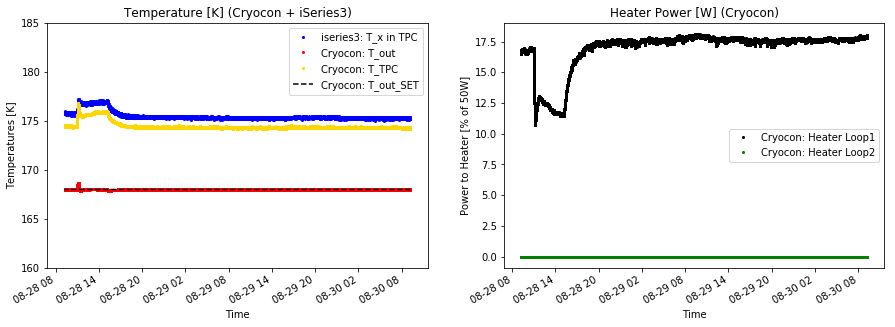

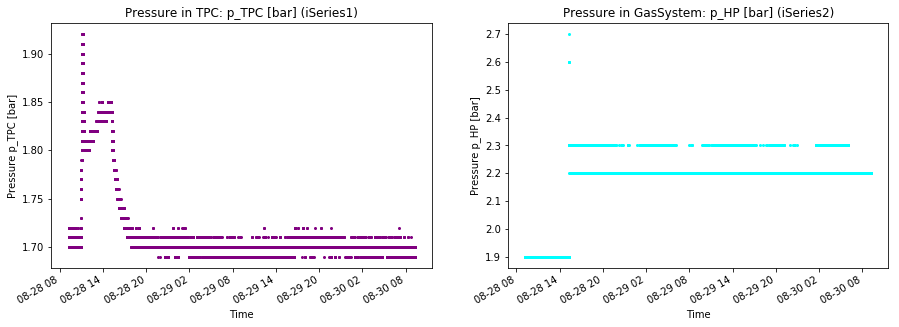

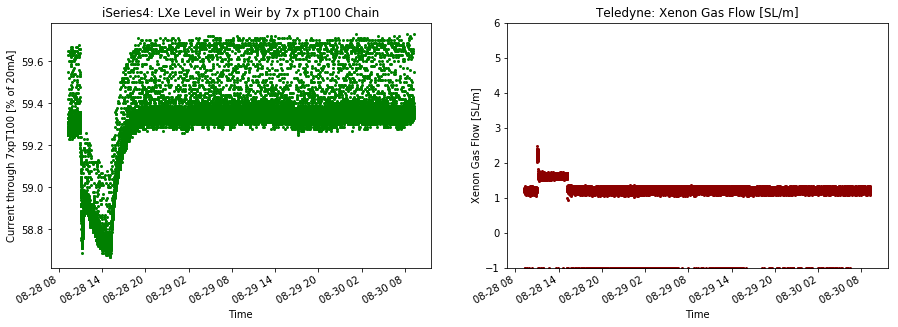

In [328]:
########## INPUT: DEFINE TIMEWINDOW ##########
date_start = datetime.now()-timedelta(days=2)
#date_start = datetime.now()-timedelta(days=1)
#datetime(2018,8,27,8,0,0,0)

date_end = datetime.now()


########## PLOTTING - CRYOCON ##########
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))


controller_name = 'iseries3'
time, data = get_data(controller_name, date_start, date_end)
data = data + 273.15
ax1.plot_date(time, data[:,0], label='iseries3: T_x in TPC', color='blue', markersize=2)

controller_name = 'cryocon_22c'
time, data = get_data(controller_name, date_start, date_end)
ax1.plot_date(time, data[:,0], label='Cryocon: T_out', color='red', markersize=2)
ax1.plot_date(time, data[:,1], label='Cryocon: T_TPC', color='gold', markersize=2)
ax1.plot_date(time, data[:,2], label='Cryocon: T_out_SET', color='black', linestyle='dashed', markersize=0)

ax1.set_title('Temperature [K] (Cryocon + iSeries3)')
ax1.set_ylabel('Temperatures [K]')
ax1.set_ylim((160, 185)) 
ax1.set_xlabel('Time')
ax1.legend()

ax2.plot_date(time, data[:,4]/2, label='Cryocon: Heater Loop1', color='black', markersize=2)
ax2.plot_date(time, data[:,5]/2, label='Cryocon: Heater Loop2', color='green', markersize=2)
ax2.set_title('Heater Power [W] (Cryocon)')
ax2.set_ylabel('Power to Heater [% of 50W]')
ax2.set_xlabel('Time')
ax2.legend()

fig.autofmt_xdate()

plt.show()

########## PLOTTING - Pressure from iSeries 1&2 ##########

controller_name = 'iseries1'
time, data = get_data(controller_name, date_start, date_end)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.plot_date(time, data[:,0],color='purple', markersize=2)
ax1.set_title('Pressure in TPC: p_TPC [bar] (iSeries1)')
ax1.set_ylabel('Pressure p_TPC [bar]')
ax1.set_xlabel('Time')

controller_name = 'iseries2'
time, data = get_data(controller_name, date_start, date_end)
ax2.plot_date(time, data[:,0], color='cyan', markersize=2)
ax2.set_title('Pressure in GasSystem: p_HP [bar] (iSeries2)')
ax2.set_ylabel('Pressure p_HP [bar]')
ax2.set_xlabel('Time')

fig.autofmt_xdate()

plt.show()


'''
########## PLOTTING - LXe level from smartec UTI 1 & 2 ##########

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

controller_name = 'smartec_uti1'
time, data = get_data(controller_name, date_start, date_end)
ax1.plot_date(time, data[:,0], label='smartecUTI1: SLM1', color='red', markersize=2)
ax1.plot_date(time, data[:,1], label='smartecUTI1: SLM2', color='gold', markersize=2)
ax1.plot_date(time, data[:,2], label='smartecUTI1: SLM3', color='black', markersize=2)
ax1.set_title('Smartec UTI1: LXe Level in SLM1-3 [pF]')
ax1.set_ylabel('SLM Capacitance [pF]')
ax1.set_xlabel('Time')
ax1.legend()

controller_name = 'smartec_uti2'
time, data = get_data(controller_name, date_start, date_end)
ax2.plot_date(time, data[:,0], color='darkblue')
ax2.set_title('Smartec UTI2: LXe Level in LLM [pF]')
ax2.set_ylabel('LLM Capacitance [pF]')
ax2.set_xlabel('Time')

fig.autofmt_xdate()
plt.show()
'''

########## PLOTTING - Xe flow and LN2 level ##########

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

controller_name = 'iseries4'
time, data = get_data(controller_name, date_start, date_end)
ax1.plot_date(time, data[:,0], color='green', markersize=2)
ax1.set_title('iSeries4: LXe Level in Weir by 7x pT100 Chain')
ax1.set_ylabel('Current through 7xpT100 [% of 20mA]')
plt.ylim((52, 62)) 
ax1.set_xlabel('Time')

controller_name = 'Teledyne'
time, data = get_data(controller_name, date_start, date_end)
ax2.plot_date(time, data[:,0], color='darkred', markersize=2)
ax2.set_title('Teledyne: Xenon Gas Flow [SL/m]')
ax2.set_ylabel('Xenon Gas Flow [SL/m]')
ax2.set_ylim((-1, 6))
ax2.set_xlabel('Time')

fig.autofmt_xdate()

plt.show()


